# Presidential Elections from a Data Science Perspective

A historical data exploration on US presidential elections is presented. More specifically, the margins of victory in all the states and nationally are analyzed for presidential elections between 1940 and 2016. Whereas some correlations in the data confirm well known political trends, some interesting results point to possible campaign strategies for Democrats or Republicans that can be adapted to particular political contexts.

**Outline**
1. Introduction
2. Gathering the data
3. Data processing
4. Exploring the data
6. Potential campaign strategies
7. Conclusions

# 1. Introduction

There is an abundance of political commentary regarding the dynamics of US presidential elections. In some cases the commentary includes sound data-driven analysis. Publicly accessible analysis tends to focus on the coming election with only passing references to previous election results. Indeed, each presidential election is unique and often include decisive idiosyncratic events such as October surprises. 

Nevertheless, there are overall known trends such as the difficulty of winning an election without reaching a majority in the state of Ohio or the fact that an incumbent president usually wins a second term. These seemingly constant trends suggest that there might be interesting insights hidden in the historical data on presidential elections. Here we focus on an analysis of the margins of victory in all the states and nationally. Some of the results below agree well with common expectations while others suggest interesting novel political scenarios.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# 2. Gathering the data

I started this project under the impression that it would be rather easy to obtain a dataset on US presidential elections both statewide and through time. Much to my surprise, I could not find a single public dataset with the needed information. On the other hand, there are public [websites](http://www.presidency.ucsb.edu/elections.php) displaying information about each election as tables. The function below uses requests and BeautifulSoup to scape the data (see webscrapping.py for more details).

In [4]:
import webscrapping

webscrapping.main(year_from=1940, year_to=2016)

1940 [(u'FRANKLIN D. ROOSEVELT', u'Votes'), (u'WENDELL WILLKIE', u'Votes')]

1944 [(u'FRANKLIN D. ROOSEVELT', u'Votes'), (u'THOMAS E. DEWEY', u'Votes')]

1948 [(u'HARRY S TRUMAN', u'Votes'), (u'THOMAS E. DEWEY', u'Votes'), (u'STROM THURMOND', u'Votes')]

1952 [(u'DWIGHT D. EISENHOWER', u'Votes'), (u'ADLAI E. STEVENSON', u'Votes')]

1956 [(u'DWIGHT D. EISENHOWER', u'Votes'), (u'ADLAI E. STEVENSON', u'Votes')]

1960 [(u'JOHN F. KENNEDY\nDemocrat', u'Votes'), (u'RICHARD M. NIXON\r\n    Republican', u'Votes')]

1964 [(u'LYNDON B. JOHNSON', u'Votes'), (u'BARRY M. GOLDWATER', u'Votes')]

1968 [(u'RICHARD NIXON \nRepublican', u'Votes'), (u'HUBERT HUMPHREY \nDemocrat', u'Votes'), (u'GEORGE WALLACE \nAmerican Independent', u'Votes')]

1972 [(u'RICHARD M. NIXON', u'Votes'), (u'GEORGE McGOVERN', u'Votes')]

1976 [(u'Democrat', u'Votes'), (u'Republican', u'Votes')]

1980 [(u'RONALD REAGAN\n\nRepublican', u'Votes'), (u'JIMMY CARTER\nDemocrat', u'Votes'), (u'JOHN ANDERSON\nIndependent', u'Votes')]



The data for each election year is saved as a separate csv file in "data/presidential_elections/".

# 3. Data processing

The overall aim of this study is to analyze the correlations in the presidential election results for the various US states. Thus, the goal here is to extract the margin of victory percentage for each state from the scrapped data files.

Due to its origin as part of separate webpages the data is not fully well structured. In particular, many of the column labels had different formats from file to file. See data_processing.py for more details.

In [4]:
import data_processing

diff_df = data_processing.main(year_from=1940, year_to=2016)
diff_df

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Dist. of Col.,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,total
1940,70.9,NaN,27.5,57.4,16.1,-2.5,7.1,9.6,NaN,48.0,...,34.9,61.6,24.7,-9.9,36.5,17.6,14.2,1.8,5.9,9.9
1944,63.1,NaN,17.9,40.2,13.5,-6.8,5.4,9.1,NaN,40.6,...,21.2,54.8,21.0,-14.2,25.0,14.6,9.8,-1.8,-2.4,7.5
1948,-19.0,NaN,10.0,40.7,0.5,5.4,-1.6,-1.2,NaN,15.2,...,12.2,40.8,9.0,-24.6,6.9,9.9,15.1,4.4,4.3,4.4
1952,29.6,NaN,-16.6,12.1,-13.6,-21.3,-11.8,-3.9,NaN,-10.0,...,-0.3,-6.4,-17.8,-43.3,-12.9,-9.6,3.8,-22.3,-25.6,-10.5
1956,17.1,NaN,-22.1,6.7,-11.1,-20.7,-27.4,-10.5,NaN,-14.5,...,-0.6,-11.3,-29.2,-44.4,-17.0,-8.5,-8.2,-23.8,-20.2,-15.4
1960,15.1,-1.8,-11.1,7.1,-0.5,-9.7,7.4,1.6,NaN,-3.0,...,-7.1,2.0,-9.6,-17.3,-5.4,-2.4,5.4,-3.8,-10.0,0.2
1964,-69.5,31.8,-0.9,12.7,18.3,23.1,35.7,22.1,71.0,2.2,...,11.0,26.8,9.4,32.6,7.3,24.6,35.8,24.4,13.2,22.6
1968,4.7,-2.7,-19.8,-0.4,-3.1,-9.2,5.2,-3.5,63.6,-9.6,...,-9.7,1.2,-25.4,-9.3,-10.9,2.1,8.8,-3.6,-20.3,-0.7
1972,-46.9,-23.5,-32.8,-38.2,-13.5,-28.0,-18.5,-20.4,56.5,-44.1,...,-38.0,-32.9,-41.2,-26.2,-37.7,-18.3,-27.2,-9.7,-38.5,-23.2
1976,13.1,-22.2,-16.6,30.1,-1.7,-11.4,-5.2,5.4,65.1,5.3,...,13.0,3.1,-28.8,-11.3,-1.3,-3.9,16.1,1.6,-19.5,2.1


Saved as "data/dem-rep_diff_per_state.csv". 

The margin of victory here is the percent difference in the election results between the Democratic and Republican candidates.

# 4. Exploring the data

## 4.1 Comparisons with the nationwide trend

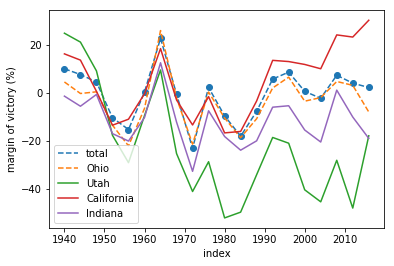

In [17]:
diff_df = pd.read_csv("data/dem-rep_diff_per_state.csv", index_col=0)
lines = ['Utah', 'California', 'Indiana']
ax = diff_df.reset_index().plot(x='index', y="total", style="--o")
ax = diff_df.reset_index().plot(x='index', y="Ohio", style="--", ax=ax)
diff_df.reset_index().plot(x='index', y=lines, ax=ax)
__ = plt.ylabel("margin of victory (%)")

The line labeled as "total" above corresponds with the nationwide margin of victory. 

Notice that, as it is well known, Ohio tends to closely follow the national trend. Of course a big question to pose here may be whether Ohio (possibly due to its political diversity) is just an indicator of the national mood or if it also strategically controls (possibly regionally) the outcome of the elections.

To have an overall look at the correlations between the states and the national trend a scatter plot is given below.

### Correlations with the nationwide trend

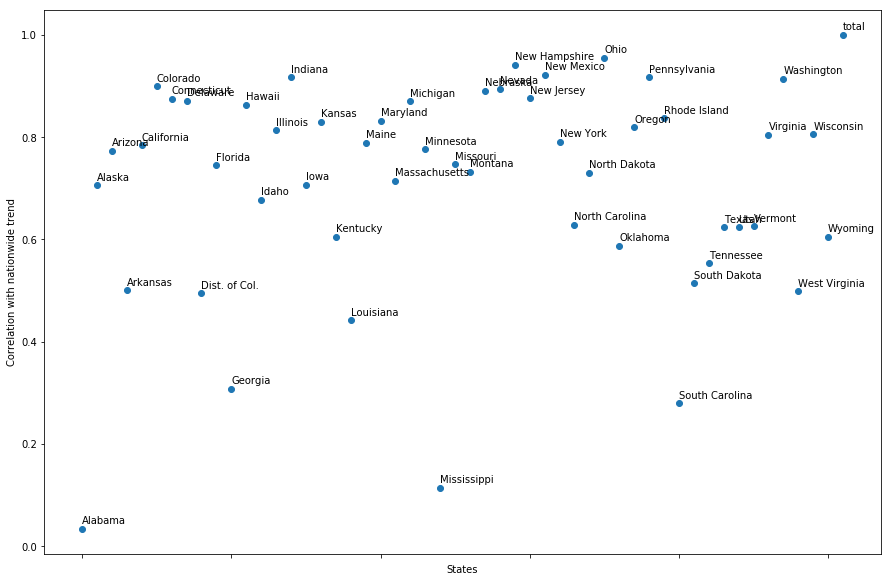

In [22]:
s = diff_df.corr()['total']
ax = s.plot(figsize=(15, 10), rot=90, style="o")
indxs = range(s.size)

for index in indxs:
    label = s.index[index]
    x = index
    y = s[index]
    ax.annotate(label, (x, y + 0.01))

plt.xlabel("States")
__ = plt.ylabel("Correlation with nationwide trend")

It can be seen that Ohio is indeed the state with the highest correlation with the total nationwide trend. On the other hand, Ohio is closely followed by other swing states such as New Mexico, New Hampshire, and Pennsylvania or even by reliably Republican or Democratic states such as Indiana or Washington. A few currently solidly Republican states and DC appear not affected much by the national trend (i.e., correlate with the nationwide total by less than 0.5).

### Average differences with the nationwide trend

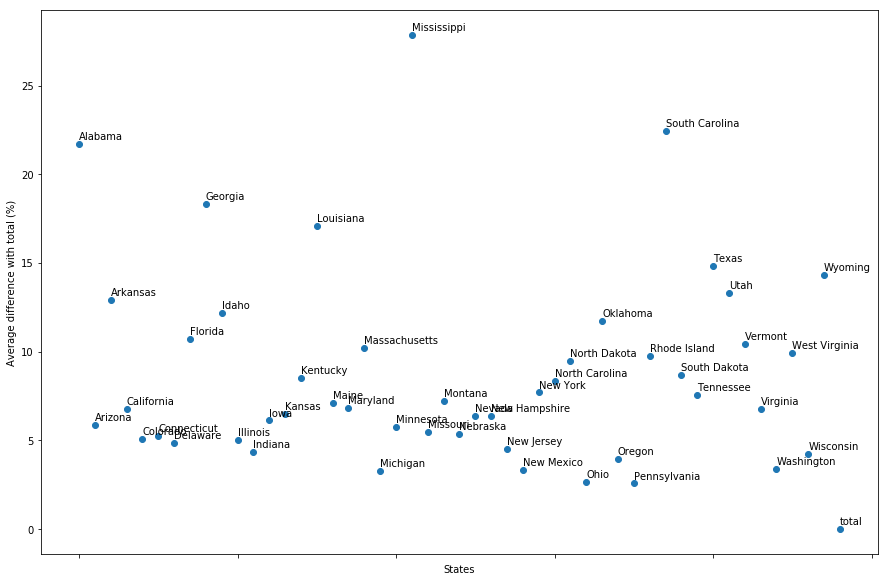

In [25]:
minus_total_df = diff_df.dropna(axis=1).subtract(diff_df["total"], axis=0)
s = minus_total_df.abs().std(axis=0)
ax = s.plot(figsize=(15, 10), style="o")
indxs = range(minus_total_df.shape[1])

for index in indxs:
    label =s.index[index]
    x = index
    y = s[index]
    ax.annotate(label, (x, y + 0.25))

plt.xlabel("States")
__ = plt.ylabel("Average difference with total (%)")

A nationwide margin of victory of ~14% (as in 57% to 43%) would tend to envelope enough states so as to result in a landslide victory.

### Statistical tests

**Can Ohio's results be explained by the national trend?**

In [26]:
import statsmodels.formula.api as smf

mod = smf.ols(formula='total ~ Ohio', data=diff_df)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     189.7
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           5.34e-11
Time:                        17:20:08   Log-Likelihood:                -51.079
No. Observations:                  20   AIC:                             106.2
Df Residuals:                      18   BIC:                             108.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7876      0.775      3.596      0.0

The p-value for the Null hypothesis is less than 0.001 which would confirm that Ohio closely follows the national trend. The coefficient of determination (R-squared) is very high at 0.913.

**What about Pennsylvania vs. the nationwide trend?**

In [27]:
import statsmodels.formula.api as smf

mod = smf.ols(formula='total ~ Pennsylvania', data=diff_df)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     95.04
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           1.32e-08
Time:                        17:23:20   Log-Likelihood:                -57.160
No. Observations:                  20   AIC:                             118.3
Df Residuals:                      18   BIC:                             120.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.0570      1.004     -2.049   

This hypothesis is also confirmed against the null hypothesis, but now the R-squared is significantly reduced to 0.841.

## 4.2 Comparisons between states

### Neighboring effects

**How correlated is Pennsylvania to Ohio?**

With the national trend removed.

In [28]:
import statsmodels.formula.api as smf

mod = smf.ols(formula='Pennsylvania ~ Ohio - total', data=diff_df)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:           Pennsylvania   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     156.0
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           2.64e-10
Time:                        17:28:49   Log-Likelihood:                -51.790
No. Observations:                  20   AIC:                             107.6
Df Residuals:                      18   BIC:                             109.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6850      0.803      5.833      0.0

Pennsylvania seems to be more correlated to Ohio (adjusted R-squared=0.891) than to the nationwide trend (adjusted R-squared=0.832). Maybe not so surprising since they are neighbors.

** What about Pennsylvania and New Jersey?**

In [35]:
import statsmodels.formula.api as smf
import utils

# switch to state names without spaces for use in the statsmodel formula:
lower_cols = [utils.to_lower_letters(x) for x in diff_df.columns]
diff_df_low = diff_df.copy()
diff_df_low.columns = lower_cols

mod = smf.ols(formula='pennsylvania ~ newjersey - total', data=diff_df_low)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:           pennsylvania   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     58.55
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           4.59e-07
Time:                        17:41:01   Log-Likelihood:                -60.004
No. Observations:                  20   AIC:                             124.0
Df Residuals:                      18   BIC:                             126.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4128      1.146      1.233      0.2

Now the adjusted R-squared is significantly lower at 0.752.

Neighbors tend to, of course, be correlated, but some states are more influential than others. Also, states, like people, tend to belong to certain clusters of culturally similar states. Will study state clustering next.

### State clusters

**Reduce dimensionality using PCA**

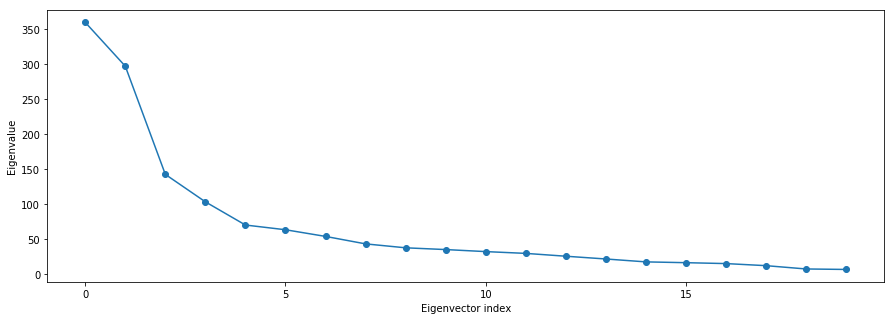

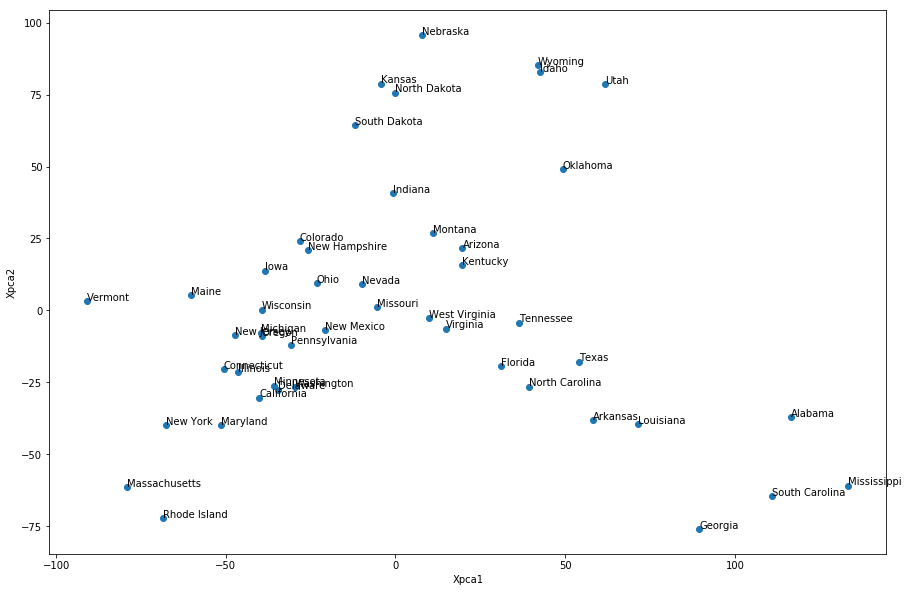

In [45]:
from sklearn.decomposition import PCA

diff_df = pd.read_csv(
    "data/dem-rep_diff_per_state.csv", index_col=0
)
cols = [x for x in diff_df.columns if "total" not in x]
Xcols = diff_df[cols].dropna(axis=1).columns
X = diff_df[cols].dropna(axis=1).values.T
pca = PCA(n_components=20)
X = pca.fit_transform(X)

plt.figure("eigenvalues", figsize=(15, 5))
plt.plot(pca.singular_values_, "-o")
__ = plt.xlabel("Eigenvector index")
__ = plt.ylabel("Eigenvalue")
plt.xticks([0, 5, 10, 15])


plt.figure("scatter", figsize=(15, 10))
plt.plot(X[:, 0], X[:, 1], "o")
ax = plt.gca()

for x, y, label in zip(X[:, 0], X[:, 1], Xcols):
    ax.annotate(label, (x, y + 0.25))

__ = plt.xlabel("Xpca1")
__ = plt.ylabel("Xpca2")

The states appear to group into three clusters: one approximately corresponding to Northeastern and West coast states, a second one corresponding to Southern states, and a third one with mid west states. Notice that Ohio lies close to the center of gravity (particularly if the contribution of each state is weighted by its population).

There are two outstanding eigenvalues along a group of gradually decreasing eigenvalues. Since the eigenvalues are proportional here to the importance of the corresponding eigenvector, taking the first 10 eigenvectors will capture most of the variance in the data.

From the above considerations the states will be grouped in three clusters derived from the first 10 eigenvectors.

**K-means clustering**

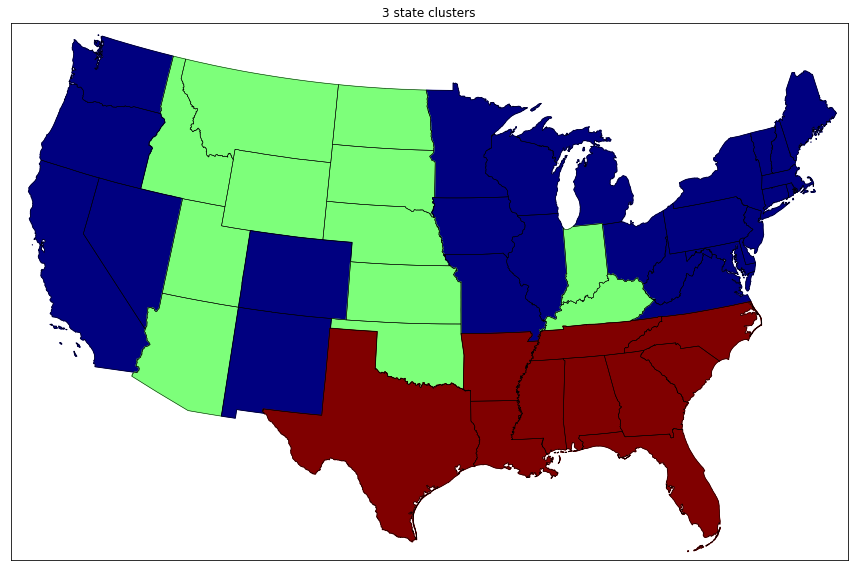

In [49]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import map_plot

diff_df = pd.read_csv(
    "data/dem-rep_diff_per_state.csv", index_col=0
)
cols = [x for x in diff_df.columns if "total" not in x]
Xcols = diff_df[cols].dropna(axis=1).columns
X = diff_df[cols].dropna(axis=1).values.T
pca = PCA(n_components=10)
X = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

cluster_dict = dict(zip(Xcols, kmeans.labels_))
map_plot.main(
    states_to_values_dict=cluster_dict,
    title="3 state clusters",
    figname="US map plot",
    figsize=(15, 10),
    cal_blue_tex_red=True,
    cmap=plt.cm.jet,
)
# note: to get the map might have to install basemap:
# sudo apt-get install python-mpl_toolkits.basemap
# for more details on the program see map_plot.py

The map above must look familiar to anyone acquainted with current political alignments in the US. Democratic-leaning states in both coasts are placed in the same group along with some Mid Western and South Western states. The Republican-leaning states have been broken up into two groups with the deep South being separated from the other states. This separation may reflect cultural differences as well as the much greater strength of the Republican support in the deep South.

One surprising fact is that the state of Virginia flipped to the Democratic side very recently (since 2008), while the data considers elections since 1940. The realignment of Virginia with the North East seemed to have been embedded in the data long before 2008.

On the other hand, a currently deep red state such as West Virginia is placed on the Democratic side. Perhaps this is the result of the data mixing too different political epochs (i.e., the 1940's with the 2010's). Unfortunately, there are very few data points as it is for studying large-scale (country wide) effects (i.e., this  is akin to attempting to train a machine learning classifier with a dataset containing a large number of columns with too few samples). Thus, repeating the above procedure with only more recent data points (e.g., form 1980 to 2016) does not give good results.

Fewer samples may work, though, for solving local problems (i.e., similar to training a classifier on a dataset with few columns). The next section attempts to extract further information from the data by performing a series of local analyses.

# 5. Potential campaign strategies

Possible campaign strategies are discussed here by identifying the most influential states. As mentioned above, local simple models are favored in the current circumstance in which very few samples are available.

## 5.1 Approximating state influence over neighbors

The influence of a state over its neighbors is approximated here by the average of the (one-to-one) correlations between the said state (e.g., California) and its nearest neighbors (e.g., Oregon, Nevada, and Arizona). The coefficient of determination R-squared was selected to quantify the state to state correlation. The nationwide trend was removed in each regression.

The process above was repeated for three time periods: 1940 to 1972, 1972 to 2000, and 1980 to 2016, as shown next.

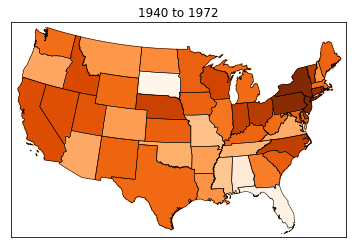

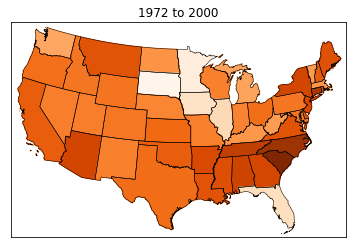

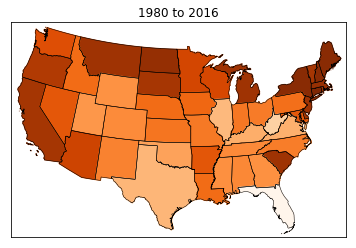

In [55]:
import statsmodels.formula.api as smf
import utils

def get_inluence_of_states(year_from=1940, year_to=2016):
    diff_df = pd.read_csv(
        "data/dem-rep_diff_per_state.csv", index_col=0
    )
    # switch to state names without spaces for use in the statsmodel formula:
    lower_cols = [utils.to_lower_letters(x) for x in diff_df.columns]
    diff_df_low = diff_df.copy()
    diff_df_low.columns = lower_cols
    
    neigh_dict = utils.get_state_neighbors(avoid=["AK", "DC"])
    
    ni = np.argwhere(diff_df.index == year_from).ravel()[0]
    nf = np.argwhere(diff_df.index == year_to).ravel()[0] + 1
    influence = {}

    for state, neighbors in neigh_dict.iteritems():
        state_lower = utils.to_lower_letters(state)
        neighbors_lower = [utils.to_lower_letters(x) for x in neighbors]
        r_squares = []

        for neigh in neighbors_lower:
            formula = "{} ~ {} - total".format(neigh, state_lower)
            mod = smf.ols(formula=formula, 
                          data=diff_df_low.iloc[ni:nf])
            res = mod.fit()
            r_squares.append(res.rsquared_adj)

        influence[state] = np.mean(r_squares)
        
    return influence

periods = np.array([[1940, 1972], [1972, 2000], [1980, 2016]])

for year_from, year_to in zip(periods[:, 0], periods[:, 1]):
    title="{} to {}".format(year_from, year_to)
    influence = get_inluence_of_states(year_from, year_to)
    
    map_plot.main(
        states_to_values_dict=influence,
        title=title,
        figname=title,
        figsize=(),
        cal_blue_tex_red=False,
        cmap=plt.cm.Oranges,
    )

In the above plots, the darker the color corresponds to greater state influence.

Consistently, the most and least influential states appear to be New York and Florida, respectively. As time went on, one can see what seems to be a consolidation effect in which influential states seem to lie near the core of a group.

Notice the seemingly gradual loss of influence score of Texas. This may point to the fact that Texas is indeed politically changing and not going along with its neighbors as it used to be.

## 5.2 Suggested campaign strategies

State influence is applied here to electoral campaign strategy from a voter turn out point of view. The discussion will be based on the identified influential states for the latest period above (1980 to 2016).

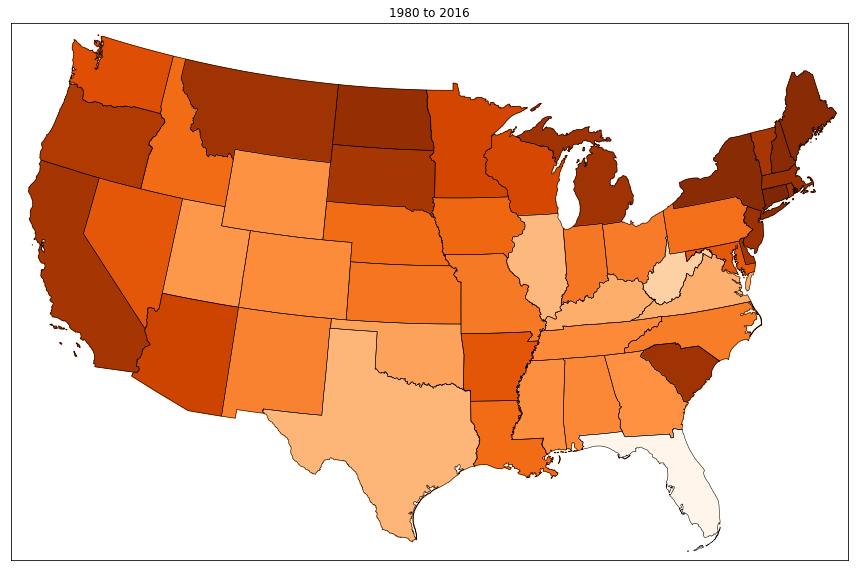

In [57]:
year_from=1980
year_to=2016
title="{} to {}".format(year_from, year_to)
influence = get_inluence_of_states(year_from, year_to)
    
map_plot.main(
    states_to_values_dict=influence,
    title=title,
    figname=title,
    figsize=(15, 10),
    cal_blue_tex_red=False,
    cmap=plt.cm.Oranges,
)

### Proposed method for flipping neighboring states

The main **assumption** here is that if a state is really that influential among its neighbors, then its grass root activists can be deployed onto its neighbors to great effect. This, of course, is not meant to reduce the importance of activist of the same state in turning out the vote. The above map suggest, though, ways for campaigns to leverage the influence of neighboring assets.

Other influence mechanisms (not easily controllable by a political campaign) include the influential state's economy. For instance, the currently booming California economy may induce its neighbors (importantly Nevada and Arizona) to copy California's policies. Even if a state economy can not be controlled by a campaign, this favorable development may be amplified by bringing activists from California into Nevada and Arizona.

### Strategic influential states

The following states are briefly discussed in terms of their strategic location and possible role in future campaigns.

**California** 
As mentioned above, the booming economy of this vibrant state may be a contributing factor of its increased influence. California is considered below as a defensive and offensive Democratic base.

**Oregon** is also considered as a defensive-offensive Democratic base.

**Arizona** 
shows a high influence score, although not of the highest. It is considered here as an strategic state because of its defensive potential for counteracting the effects of California.

**Montana, North and South Dakota** 
These influential states are taken also as Republican bulwarks against California's influence.

**Michigan** 
The former manufacturing center of the country that has experienced a large decline since its peak in the 1950's. Michigan is, in an economic sense, the polar opposite of California. Due to its strategic location, close to many swing states, and to its current status as a toss up state, Michigan may be the most relevant state for both Republicans and Democrats in both defense and offense. Adding to this, there may be a domino effect: if Michigan goes one way or the other it could influence Wisconsin which can, in turn, influence Minnesota and possibly Iowa.

**New York and New Jersey** 
may be considered as offensive Democratic bases towards Pennsylvania.

**South Carolina** 
may be considered in a defensive Republican strategy.

### Democratic strategies

**Offense**

California-Oregon in the west, Michigan in the middle, and New York-New Jersey in the east can be leveraged. California's activist may help keep Nevada and flip Arizona to the Democratic side. As mentioned above, activists from New York and western New Jersey could be deployed into Pennsylvania (which narrowly voted Republican 2016).

Michigan deserves an special analysis. Traditionally a Democratic stronghold, economic circumstances have pushed this state into a toss up status. There is a dwindling presence in Michigan of unionized white working class support for the Democratic party. Activists from this constituency may be leveraged for promoting welfare state policies that may ameliorate the damage brought about by the state's (and the region's) economic decline. The problem with this message is that it is a passive one that assumes that the economic decline can not be stopped. It would be better, by comparison, to promote an infrastructure package that may make the region more attractive to new industries. The nearby presence of Chicago may play a role in such plans. Both, the positive and passive messages above may contribute in turning Michigan and neighboring states back to the Democratic side. Elements of a protectionist message (see below) might also be worth exploring by Democrats.

**Defense**

Activists from California and Oregon may be deployed to Washington state. Also activists from all the neighboring states may be deployed into New Hampshire. In Michigan, the same arguments above are valid here in a defensive sense.

### Republican strategies

**Offense**

The most fertile ground here seems to be the state of Michigan. The faltering regional economy may provide an opening for a populist message of arresting the economic decline through protectionism. The same argument can be turned more positive by suggesting that some automobile industries may reopen in the area if the imposed tariffs on imports are high enough. A problem with this strategy may be that, for many reasons, imposing tariffs and deregulating the economy may not deliver the desired results, which could cause a backlash.

**Defense**

Michigan is, again, very important from a defensive point of view. Arizona, Montana, North Dakota, and South Dakota can be leveraged to counter the effects of California on the West. From the influence map above, activists from South Carolina may be deployed to neighboring states to prevent Democratic encroachments (particularly in North Carolina).

# 6. Conclusions

A presidential elections dataset was built and then analyzed. The analysis centered on the extraction of correlations between the states and the states vs. the national trend. Local correlations were found particularly revealing of current and potentially future electoral trends.